## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [128]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import math
%matplotlib inline


data_folder = './data/'

In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

# Getting started

In [3]:
df = original_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome_type              79662 non-null  object 
 1   sex_upon_outcome          79671 non-null  object 
 2   age_upon_outcome_(years)  79672 non-null  float64
 3   animal_type               79672 non-null  object 
 4   intake_condition          79672 non-null  object 
 5   intake_type               79672 non-null  object 
 6   sex_upon_intake           79671 non-null  object 
 7   age_upon_intake_(years)   79672 non-null  float64
 8   intake_year               79672 non-null  int64  
 9   intake_number             79672 non-null  float64
 10  time_in_shelter_days      79672 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 6.7+ MB


In [4]:
df.sample(10)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
30573,Adoption,Spayed Female,5.000000,Dog,Normal,Stray,Spayed Female,5.000000,2015,1.0,50.121528
27789,Adoption,Spayed Female,1.000000,Dog,Normal,Stray,Intact Female,1.000000,2015,1.0,11.204861
61957,Transfer,Intact Female,0.328767,Dog,Injured,Stray,Intact Female,0.328767,2017,1.0,4.713194
46308,Return to Owner,Intact Male,5.000000,Dog,Normal,Public Assist,Intact Male,5.000000,2016,2.0,7.763889
51020,Adoption,Neutered Male,0.164384,Cat,Nursing,Stray,Intact Male,0.016438,2016,1.0,64.047917
49302,Euthanasia,Unknown,1.000000,Other,Injured,Wildlife,Unknown,1.000000,2016,1.0,0.145139
72602,Transfer,Spayed Female,1.000000,Dog,Normal,Public Assist,Spayed Female,1.000000,2017,1.0,11.866667
27936,Return to Owner,Neutered Male,2.000000,Dog,Normal,Stray,Neutered Male,2.000000,2015,3.0,0.266667
62389,Return to Owner,Intact Female,8.000000,Dog,Normal,Public Assist,Intact Female,8.000000,2017,1.0,1.659028
13349,Transfer,Intact Female,0.057534,Cat,Normal,Stray,Intact Female,0.057534,2014,1.0,0.042361


In [5]:
list(enumerate(df.columns))

[(0, 'outcome_type'),
 (1, 'sex_upon_outcome'),
 (2, 'age_upon_outcome_(years)'),
 (3, 'animal_type'),
 (4, 'intake_condition'),
 (5, 'intake_type'),
 (6, 'sex_upon_intake'),
 (7, 'age_upon_intake_(years)'),
 (8, 'intake_year'),
 (9, 'intake_number'),
 (10, 'time_in_shelter_days')]

## Missing values

In [6]:
df.isna().sum()

outcome_type                10
sex_upon_outcome             1
age_upon_outcome_(years)     0
animal_type                  0
intake_condition             0
intake_type                  0
sex_upon_intake              1
age_upon_intake_(years)      0
intake_year                  0
intake_number                0
time_in_shelter_days         0
dtype: int64

In [7]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(79672, 11)


(79661, 11)

## Data viz



### Categorical 

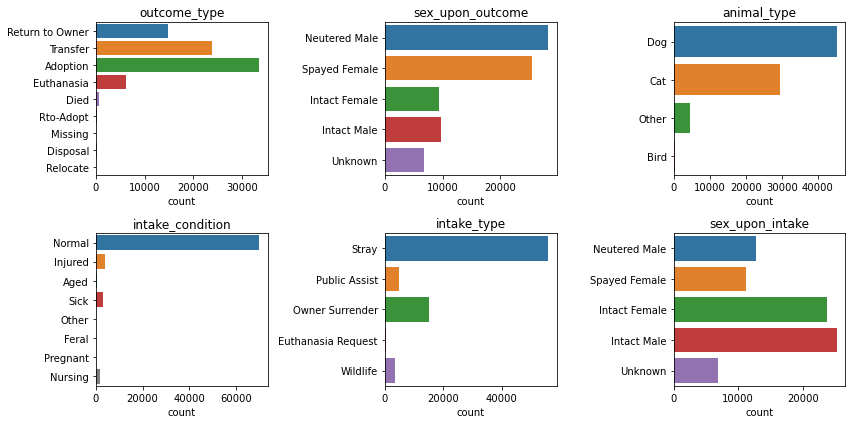

In [8]:
cat = [0, 1, 3, 4, 5, 6]
cat = [df.columns[i] for i in cat]

fig,ax = plt.subplots(2, 3, figsize=(12, 6))
for a, c in zip(ax.ravel(), cat):
    sns.countplot(y=c, ax=a, data=df)
    a.set_ylabel('')
    a.set_title(c)

plt.tight_layout()

### Continuous

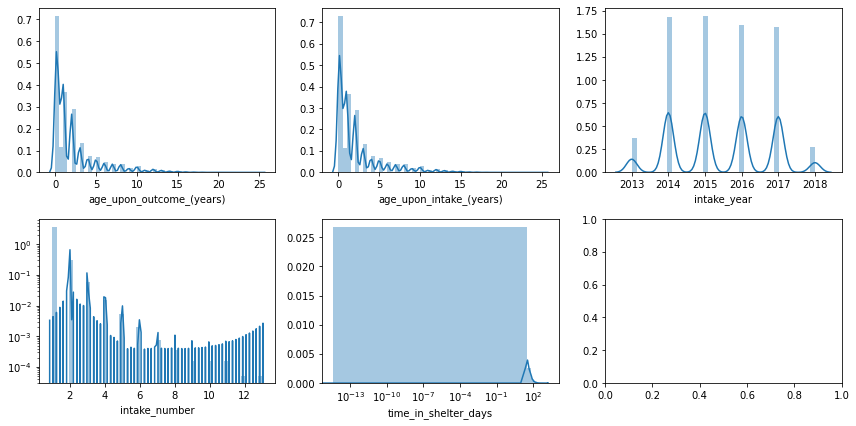

In [11]:
cont = [df.columns[i] for i in range(df.shape[1]) if df.columns[i] not in cat]

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
for a, c in zip(ax.ravel(), cont):
    sns.distplot(df[c], ax=a)
    
ax[1, 1].set_xscale('log')
ax[1, 0].set_yscale('log')
plt.tight_layout()

# Exercises

## A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

**QUESTION / TODO**: get dummies except last one, right ?

**QUESTION TODO**: order splitting / dummies / standardization : if:

1. dummy
1. split
1. standardize

-> we don't want to standardize dummies

We perform 

1. Split data
1. Standardization
1. Generate dummy variables

In this specific order. For instance, we don't want to standardize after dummy variables generation (we want to keep binary vars as... binary).

### Process outcome

In [12]:
y = df['outcome_type'].values
y = (y == 'Adoption') * 1
y

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
np.unique(y, return_counts=True)

(array([0, 1]), array([46067, 33594]))

### Split data

In [14]:
shuff_ids = np.random.permutation(df.shape[0])
train_ratio = .8
id_split = int(train_ratio * shuff_ids.shape[0])

train = df.iloc[shuff_ids[:id_split], 1:]
ytrain = y[shuff_ids[:id_split]]

test = df.iloc[shuff_ids[id_split:], 1:]
ytest = y[shuff_ids[id_split:]]

train.shape, test.shape, ytrain.shape, ytest.shape

((63728, 10), (15933, 10), (63728,), (15933,))

### Standardization

In [15]:
for c in cont:
    mean = train[c].mean()
    std = train[c].std()
    
    train[c] = (train[c] - mean) / std
    test[c] = (test[c] - mean) / std

### Categorical features conversion

We provide the argument `drop_first=True` to `pd.get_dummies` in order to get $(k-1)$ dummy variables instead of $k$, where $k$ is the number of factors of a categorical variable. This is because the last factor is represented by all dummy variables being 0.

In [16]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [17]:
[e for e in train.columns if e not in cat+cont]

['sex_upon_outcome_Intact Male',
 'sex_upon_outcome_Neutered Male',
 'sex_upon_outcome_Spayed Female',
 'sex_upon_outcome_Unknown',
 'animal_type_Cat',
 'animal_type_Dog',
 'animal_type_Other',
 'intake_condition_Feral',
 'intake_condition_Injured',
 'intake_condition_Normal',
 'intake_condition_Nursing',
 'intake_condition_Other',
 'intake_condition_Pregnant',
 'intake_condition_Sick',
 'intake_type_Owner Surrender',
 'intake_type_Public Assist',
 'intake_type_Stray',
 'intake_type_Wildlife',
 'sex_upon_intake_Intact Male',
 'sex_upon_intake_Neutered Male',
 'sex_upon_intake_Spayed Female',
 'sex_upon_intake_Unknown']

In [18]:
train.sample(10)

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,animal_type_Cat,...,intake_condition_Pregnant,intake_condition_Sick,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
8222,-0.051158,-0.039346,-1.866030,-0.278366,-0.375128,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
49886,-0.395349,-0.384364,0.432220,-0.278366,-0.253516,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
58070,0.293033,0.305673,0.432220,4.128475,-0.347457,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
65496,-0.711251,-0.716148,1.198304,-0.278366,0.525074,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
32531,4.767522,4.790910,-0.333863,-0.278366,-0.363724,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
13016,-0.395349,-0.384364,-1.099947,-0.278366,-0.373994,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
23434,-0.051158,-0.039346,-1.099947,-0.278366,-0.281122,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
226,2.702373,2.720801,-0.333863,-0.278366,-0.108752,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
19,4.423330,4.445892,-1.866030,-0.278366,-0.395865,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
59904,0.293033,0.305673,0.432220,4.128475,-0.088853,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [19]:
train.shape, test.shape

((63728, 27), (15933, 27))

## B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
lr = LogisticRegression()
lr.fit(train, ytrain)

# Automatically uses threshold 0.5
yhat = lr.predict(test)

print('Confusion matrix:')
mx = confusion_matrix(ytest, yhat, normalize='all')
mx

Confusion matrix:


/home/maousi/anaconda3/envs/ada/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.4724785 , 0.09922802],
       [0.07500157, 0.35329191]])

The confusion matrix function returns in order: tn, fp, fn, tp.

* **Precision**: among the (+) classed samples, how much are really (+)? In other words, probability to be (+) if you are said you're (+)
* **Recall**: among the truly (+) samples, probability to get (+) class? In other words, probability to be classified (+) if we know you're (+)

In [22]:
tn, fp, fn, tp = mx.ravel()

pr = tp / (tp + fp)
rec = tp / (tp + fn)

print('accuracy =', tp + tn)
print('precision =', pr)
print('recall =', rec)
print('F1 =', 2 * pr * rec / (pr + rec))

accuracy = 0.8257704136069792
precision = 0.7807212205270458
recall = 0.8248827667057443
F1 = 0.8021946700869318


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

**QUESTION / TODO: with respect to both classes??**

In [52]:
def evaluate_prediction(y, yhat):
    """
    :return: confusion matrix, accuracy, precision, recall
    """
    mx = confusion_matrix(y, yhat, normalize='all')
    
    tn, fp, fn, tp = mx.ravel()

    acc = tp + tn
    pr = tp / (tp + fp)
    rec = tp / (tp + fn)
    F1 = 2 * pr * rec / (pr + rec)
    
    return mx, acc, pr, rec, F1

def report(y, yhat):
    mx, acc, pr, rec, F1 = evaluate_prediction(y, yhat)

    print(f'Confusion matrix:\n{mx}')
    print('accuracy =', acc)
    print('precision =', pr)
    print('recall =', rec)
    print('F1 =', F1)

In [53]:
report(ytest, yhat)

Confusion matrix:
[[0.4724785  0.09922802]
 [0.07500157 0.35329191]]
accuracy = 0.8257704136069792
precision = 0.7807212205270458
recall = 0.8248827667057443
F1 = 0.8021946700869318


We now predict with a different threshold using `predict_proba`

In [54]:
# Display prediction in column 0 and probabilities in columns 1 and 2
# => identify which probability corresponds to 1
np.c_[lr.predict(test), lr.predict_proba(test)]

array([[0.        , 0.8201114 , 0.1798886 ],
       [1.        , 0.32038657, 0.67961343],
       [1.        , 0.30660394, 0.69339606],
       ...,
       [1.        , 0.40436436, 0.59563564],
       [1.        , 0.19023012, 0.80976988],
       [0.        , 0.75075297, 0.24924703]])

In [34]:
def predict(model, x, threshold):
    p_1 = model.predict_proba(x)[:, 1]
    yhat = (p_1 > threshold) * 1
    return yhat

In [36]:
# Sanity check
np.all(predict(lr, test, 0.5) == lr.predict(test))

True

In [56]:
thresholds = np.linspace(0.0, 1.0, 101)

metrics = [
    evaluate_prediction(ytest, predict(lr, test, threshold))[1:]
    for threshold in thresholds
]

metrics = pd.DataFrame(metrics, index=thresholds, columns=['accuracy', 'precision', 'recall', 'F1'])
metrics.head()

<ipython-input-52-e6fd76518218>:10: RuntimeWarning: invalid value encountered in double_scalars
  pr = tp / (tp + fp)


,accuracy,precision,recall,F1
0.00,0.428293,0.428293,1.000000,0.599728
0.01,0.496328,0.459538,0.999414,0.629587
0.02,0.533609,0.478679,0.998535,0.647134
0.03,0.546225,0.485523,0.997655,0.653171
0.04,0.564301,0.495700,0.996630,0.662091


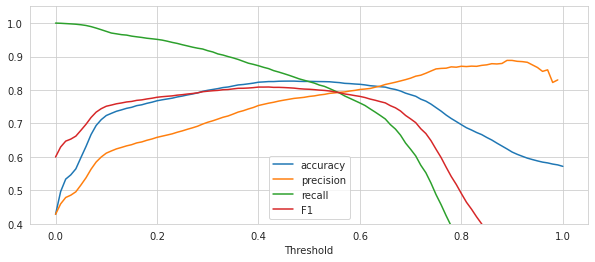

In [65]:
with sns.axes_style('whitegrid'):
    metrics.plot(figsize=(10, 4))

plt.gca().axis(ymin=.4)
plt.gca().set_xlabel('Threshold');

**TODO QUESTION**: the accuracy curve is not normal ???

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [112]:
coefs = np.c_[train.columns, lr.coef_.ravel()]
# intercept
coefs = np.concatenate([coefs, [['intercept', lr.intercept_]]])

coefs = pd.DataFrame(coefs, columns=['feature', 'value'])
coefs['abs'] = coefs.value.abs()
coefs.sort_values('abs', inplace=True, ascending=False)
coefs.head()

,feature,value,abs
7,sex_upon_outcome_Spayed Female,3.50541,3.50541
10,animal_type_Dog,-3.35988,3.35988
9,animal_type_Cat,-3.33585,3.33585
11,animal_type_Other,-2.66891,2.66891
1,age_upon_intake_(years),-2.28364,2.28364


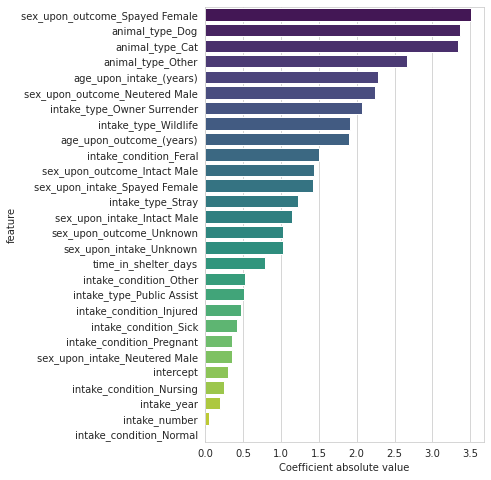

In [166]:
plt.figure(figsize=(5, 8))

with sns.axes_style('whitegrid'):
    bars = sns.barplot(y='feature', x='abs', data=coefs, palette='viridis')
    
plt.xlabel('Coefficient absolute value');

Much better if we plot diverging lines to show whether a feature is positive or negative:

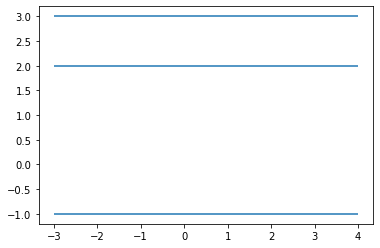

In [169]:
plt.hlines([-1,2,3], -3, 4)

In [193]:
coefs.sort_values('value', inplace=True)
coefs.reset_index(inplace=True, drop=True)

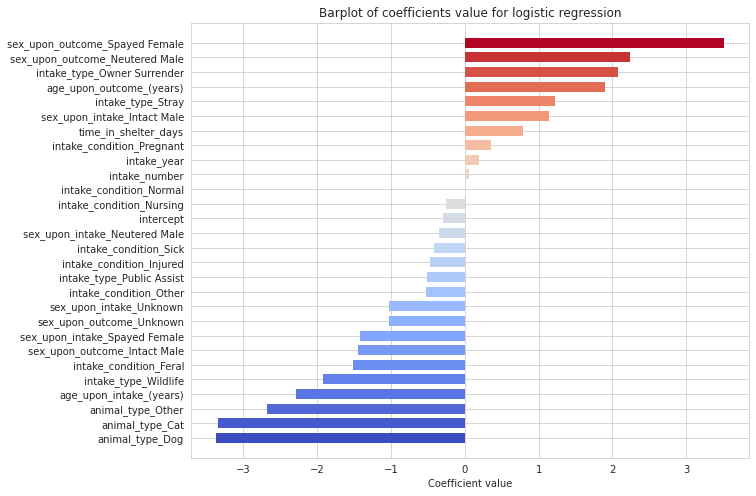

In [209]:
cmap = matplotlib.cm.get_cmap('coolwarm')
idx_zero = np.where(coefs.value > 0)[0][0]
colors = np.r_[
    cmap(np.linspace(0, 0.5, idx_zero)),
    cmap(np.linspace(0.5, 1, coefs.shape[0] - idx_zero))
]

plt.figure(figsize=(10, 8))
with sns.axes_style('whitegrid'):
    plt.hlines(coefs.feature, xmin=0, xmax=coefs['value'], color=colors, lw=10)
    
plt.xlabel('Coefficient value')
plt.title('Barplot of coefficients value for logistic regression');

To prepare for this exam, let's wrap this divergin barplot in a function:

In [218]:
%run ../plotting.py

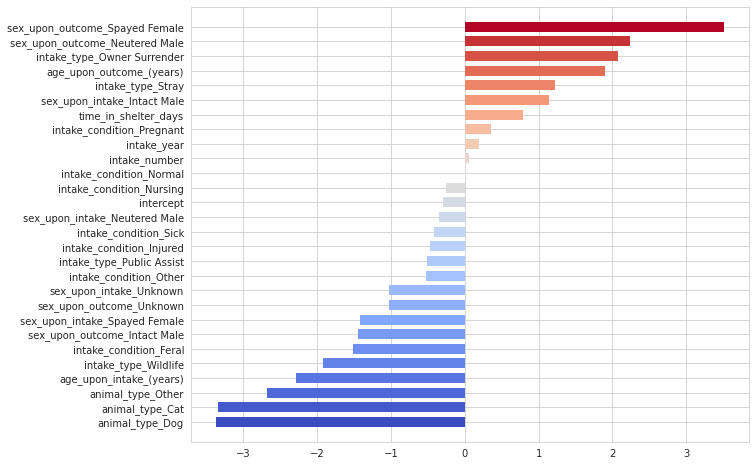

In [221]:
plt.figure(figsize=(10, 8))
with sns.axes_style('whitegrid'):
    diverging_bars(coefs.feature, coefs.value)

# Quiz

## Questions 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

Answer: a

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [66]:
# accuracy
(50+100) / 165

0.9090909090909091

In [67]:
# fp
10 / 165

0.06060606060606061

In [68]:
# tp
100 / 165

0.6060606060606061